# Tarea 2: Regresión lineal

## Importamos las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm

## Generamos el conjunto de datos

In [2]:
conjunto_datos_x=[]
conjunto_datos_y=[]
for i in range(1000):
    x = 2 * np.random.rand(100,1)
    y = 4 + 3 * x + np.random.rand(100,1)
    conjunto_datos_x.append(x)
    conjunto_datos_y.append(y)

## Entrenamos los modelos

In [3]:
modelo_entrenado=[]
for i in range(len(conjunto_datos_x)):
    conjunto_datos_x_constante=sm.add_constant(conjunto_datos_x[i])
    inicio_modelo=sm.OLS(conjunto_datos_y[i],conjunto_datos_x_constante)
    modelo_entrenado.append(inicio_modelo.fit())

## Extraemos datos importantes de cada modelo (parámetros)

In [4]:
parametros_modelo=[]
for i in range(len(modelo_entrenado)):
    parametros_modelo.append(modelo_entrenado[i].params)

## Calculamos estadística relevante para cada parámetro

In [5]:
media_parametros=[]
desviacion_parametros=[]
for i in range(len(parametros_modelo[0])):
    media_parametros.append(np.mean(np.array(parametros_modelo)[:,i]))
    desviacion_parametros.append(np.std(np.array(parametros_modelo)[:,i]))

## Histograma de parámetros

Text(0, 0.5, 'Frecuencias')

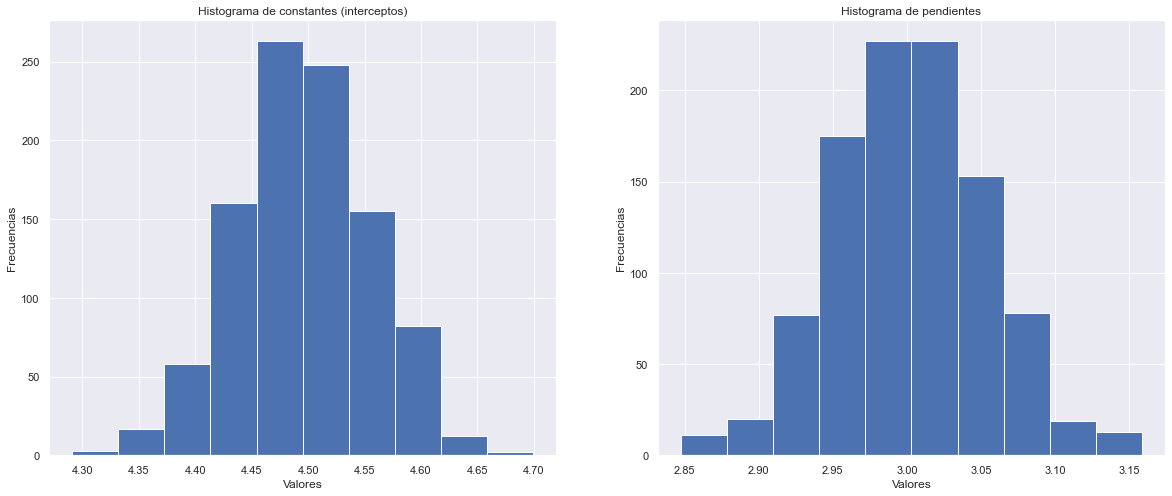

In [6]:
fig1,ax1=plt.subplots(1,2,figsize=(20,8))

ax1[0].set_title('Histograma de constantes (interceptos)')
ax1[1].set_title('Histograma de pendientes')
ax1[0].hist(np.array(parametros_modelo)[:,0])
ax1[1].hist(np.array(parametros_modelo)[:,1])
ax1[0].set_xlabel('Valores',)
ax1[1].set_xlabel('Valores')
ax1[0].set_ylabel('Frecuencias')
ax1[1].set_ylabel('Frecuencias')

In [7]:
print('La media de los parámetros (Intercepto y pendiente respectivamente) está dada por el siguiente arreglo :', media_parametros)
print('La desviación de los parámetros (Intercepto y pendiente respectivamente) está dada por el siguiente arreglo :',desviacion_parametros, )

La media de los parámetros (Intercepto y pendiente respectivamente) está dada por el siguiente arreglo : [4.49676195777252, 3.002468542845382]
La desviación de los parámetros (Intercepto y pendiente respectivamente) está dada por el siguiente arreglo : [0.05919202305497168, 0.05109962912945621]


## Boxplot de parámetros

{'whiskers': [<matplotlib.lines.Line2D at 0x22a3d7f04c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22a3d7f0b80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x22a3d7f0160>],
 'medians': [<matplotlib.lines.Line2D at 0x22a3d7fb280>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a3d7fb5e0>],
 'means': []}

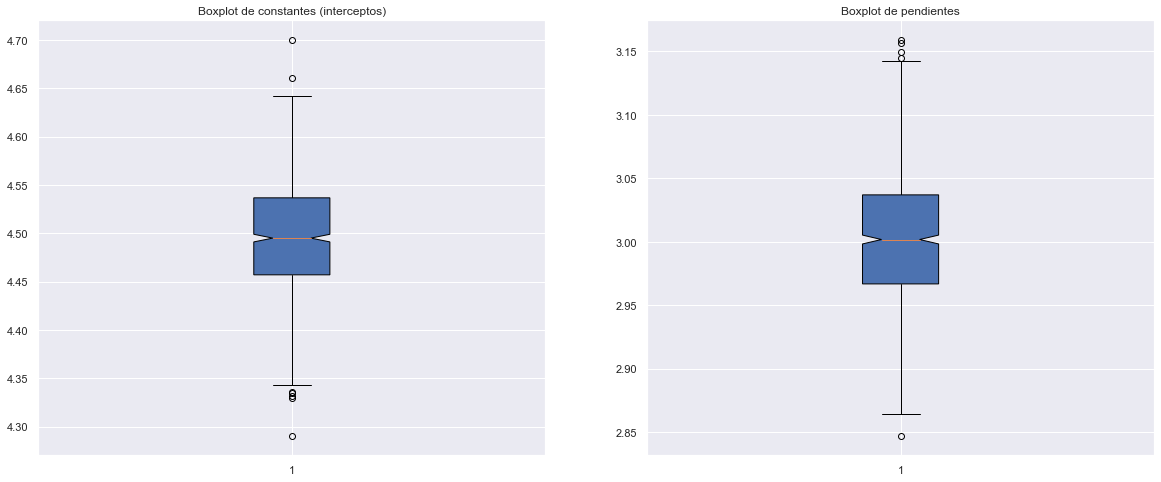

In [8]:
fig2,ax2=plt.subplots(1,2,figsize=(20,8))

ax2[0].set_title('Boxplot de constantes (interceptos)')
ax2[1].set_title('Boxplot de pendientes')
ax2[0].boxplot(np.array(parametros_modelo)[:,0],patch_artist=True,notch=True)
ax2[1].boxplot(np.array(parametros_modelo)[:,1],patch_artist=True,notch=True)

## Discusión de resultados

Tras realizar una gran serie de entrenamientos, podemos observar que tanto en los histogramas como en el gráfico de cajas nuestra distribución cumple un comportamiento que se asemeja a la normal, este resultado esperado teóricamente por el teorema central del límite que dice qué cuando el número de puntos tiende a infinito, una distribución de variables aleatorias se asemeja a la distribución normal, y en este caso nuestra simulación lo cumple ajustado a las predicciones de una distribución, qué inicialmente se comporta de manera aleatoria de forma individual, pero de manera colectiva, los valores se tienden a inclinar a una media simétrica por ambas partes, lo cual no solo confirma el teorema central del límite sino que en consecuencia, el hecho que las mismas variables sean aleatorias. También por los valores de la media y su desviación, vemos que no se genera un espectro de frecuencias muy alto, ya que su desviación es aproximadamente el 1.6% de la media (para el caso de las pendientes), lo que indica qué en términos generales si asumimos que esta es una distribución normal por lo expuesto, la media solo deberá oscilar un 5% aproximadamente su valor para recoger el 99% de los datos.

Esta tarea fue realizada por el estudiante:

Nombre: Santiago Andrés Pérez Acevedo
Cédula: 1017246165